# Simulacion del grado de propagacion de la Covid-19 Ecuador

Para realizar esta  simulacion se utilizar la libreria pygame para ello se debe instalar pygame

conda install -c cogsci pygame.


## Introduccion

En una epidemia, el parámetro fundamental, del que todo depende, es R0. Este símbolo se refiere al número de personas que, mede cada infectado contagia antes de convertirse en inofensivo ( bien porque está en aislamiento, hospitalizado o ha muerto).

El valor R0 es fundamental, porque si es grande, el contagio se alarga más rápidamente. Si R0 es 2, y si el tiempo medio en el que se permanece contagiados es una semana, y hay 1.000 infectados, entonces después de una semana los infectados será 3.000 (los 1.000 del inicio más 2.000 nuevos contagiados). 

Si R0 es 5, después de una semana los infectados será 6.000 (los 1.000 de partida más 5.000 nuevos contagiados). A este punto, el ciclo vuelve a partir, con más o menos retraso, dependiendo de cuánto tiempo un nuevo infectado emplea en convertirse a sí mismo en contagioso.

Se reconstruye la dinámica de transmisión de una enfermedad inventada con cuatro escenarios diversos: 
- 1. Sin ninguna medida de contención; 
- 2. Con la cuarentena absoluta, aunque se «escapa» algún infectado; 
- 3. Con formas de aislamiento y la distancia de seguridad entre personas que permiten salir solo a un ciudadano de cada cuatro; 
- 4. Si sale solamente un ciudadano de cada ocho. En definitiva, solo con el aislamiento se puede contener la epidemia y lograr que la respuesta sanitaria sea eficaz. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Entonces, el número reproductivo (R0): Este valor representa el número promedio de personas que un individuo infectado puede contagiar. Para el COVID-19, se estima que se encuentra entre 1.4 y 4 (Qun Li, 2020). Ademas segun  estimaciones de la OMS la probabilidad de fallecimiento es de 1.2% - 4.2%  segun https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30243-7/fulltext




In [1]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 1.4 # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 250 #Numero de filas
nb_cols = 250 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((1000,800),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (300, 30, 300, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 4, 100 + y * 12 + 4), 2)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 2, 100 + y * 12 + 3, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana
    

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


error: video system not initialized

# Practica
En concecuencia, generar 5 simulaciones: 
1. R0 obtenidos de la prediccion del SIR (Trabajo anterior)
R0 = 108.67964088081985

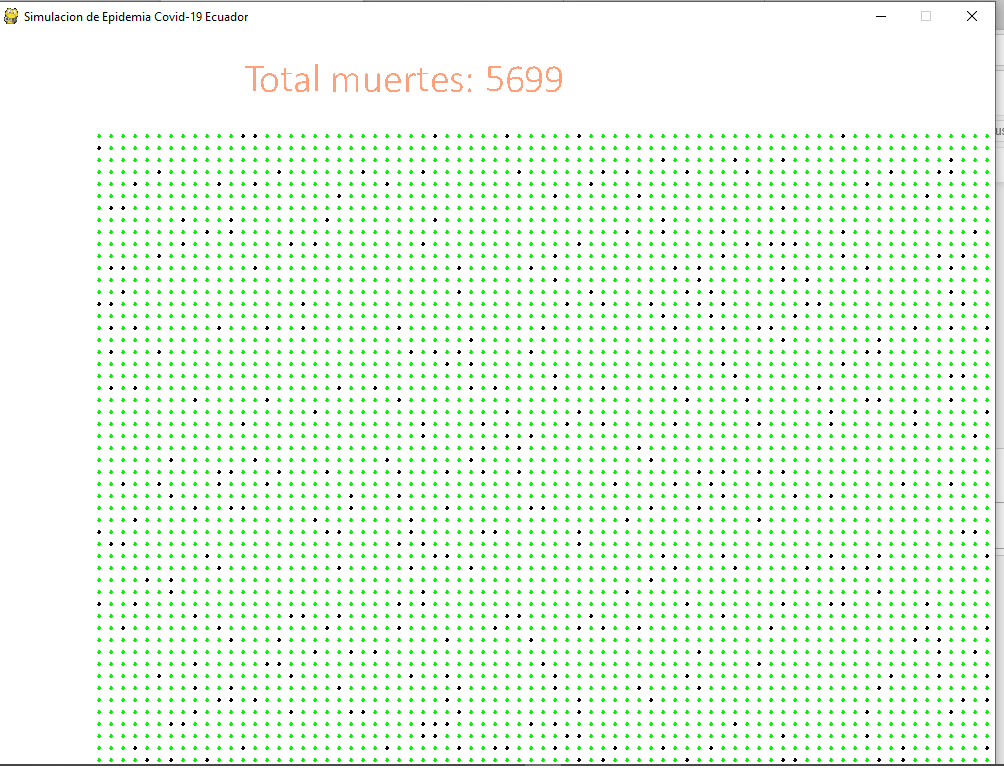

2. Predecir que va a ocurrir la proxima semana.
R0: 89.167368197

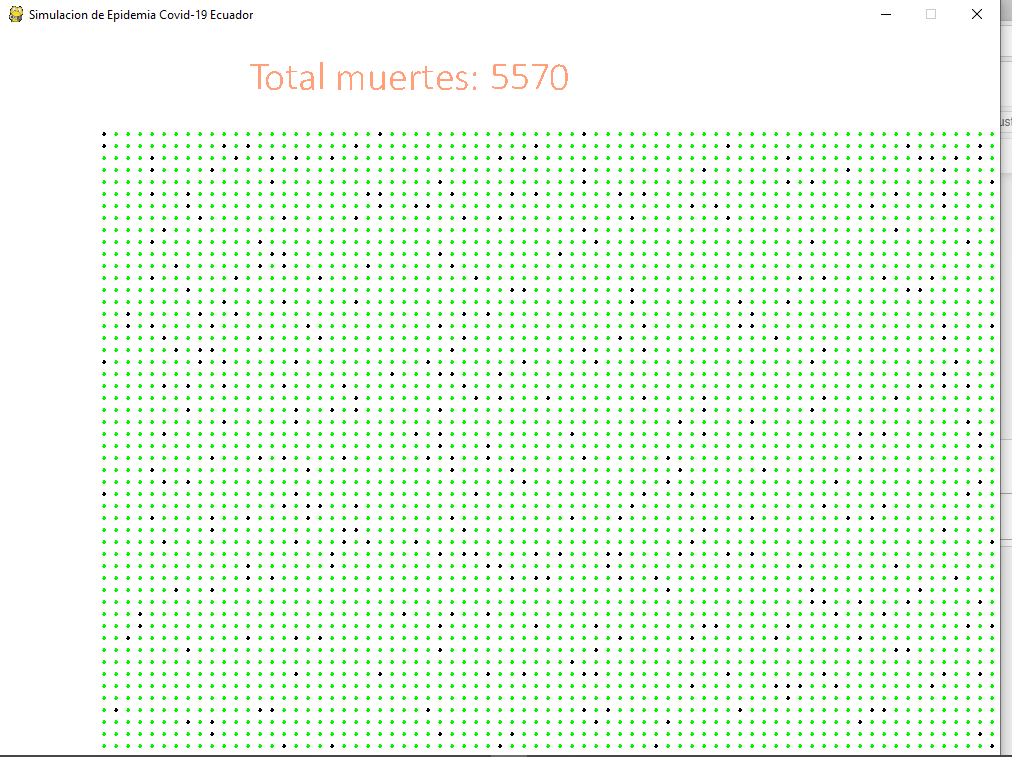

3. El valor 4, el cual representaría el peor de los casos. 
R0: 4

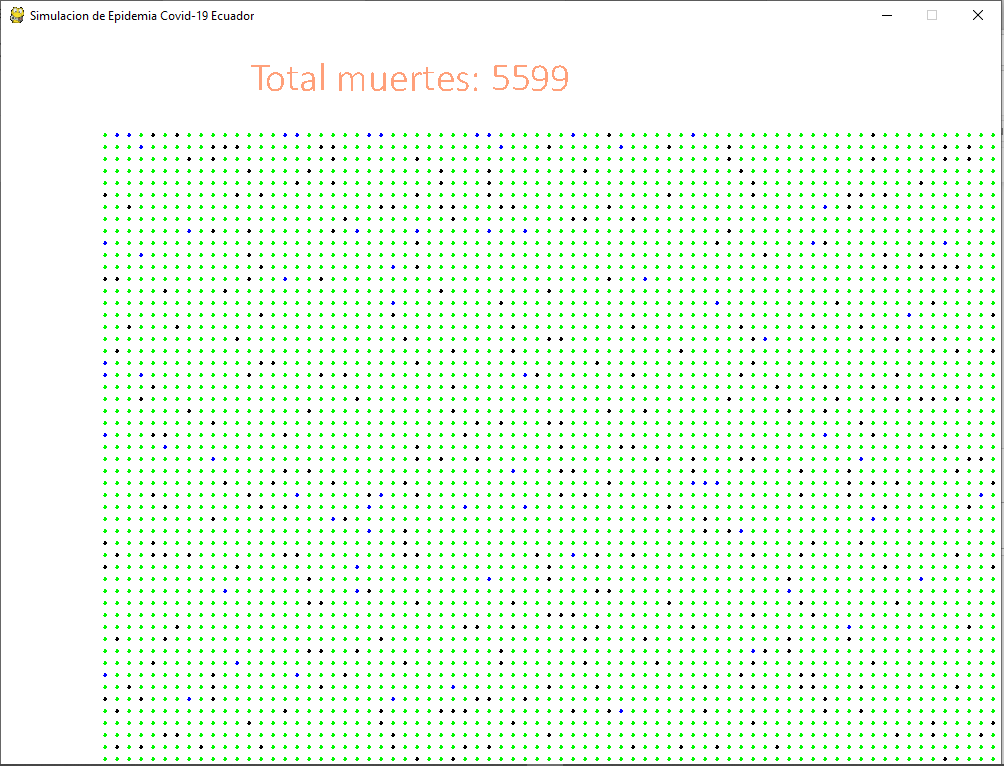


4. El valor 1.4 en el mejor de los casos
R0: 1.4

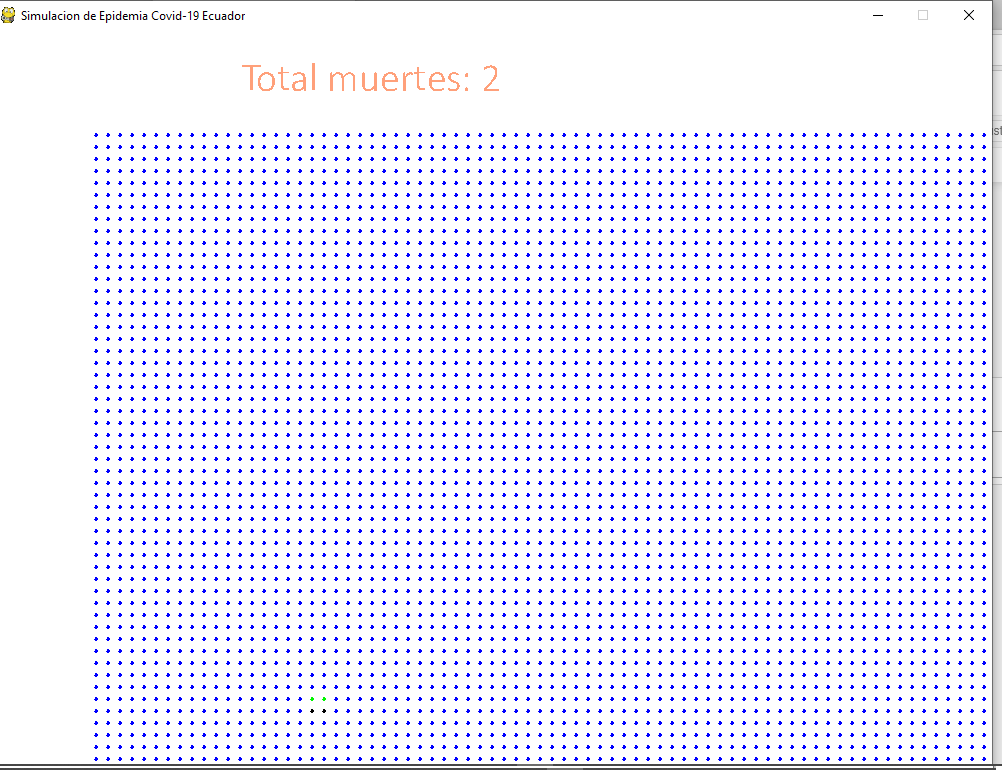


5. R0 con las medidas realizadas por el Ecuador, obtenemos el R0 solo de los dias sin cuarentena y lo evaluan con los las acciones de la cuarentena.
--R0 CON INICIO DE CUARENTENA EL 16/03/2020 HASTA EL DIA DE HOY
R0=2.5107

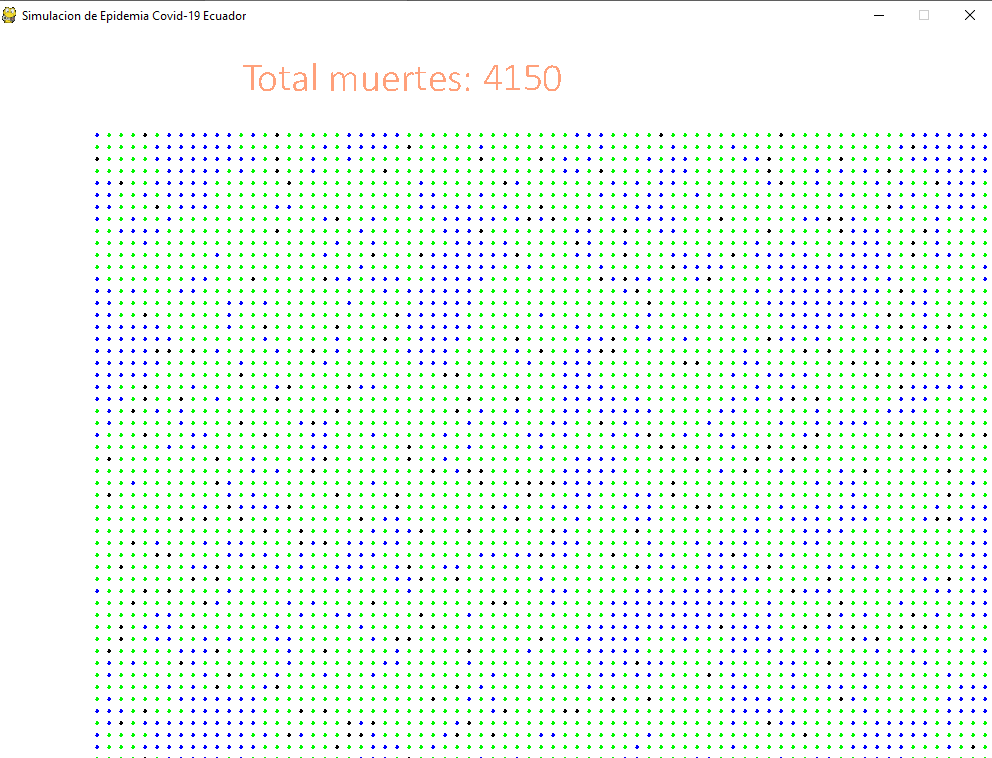

--R0 SOLO DE DIAS SIN CUARENTENA 
R0: 2.4427

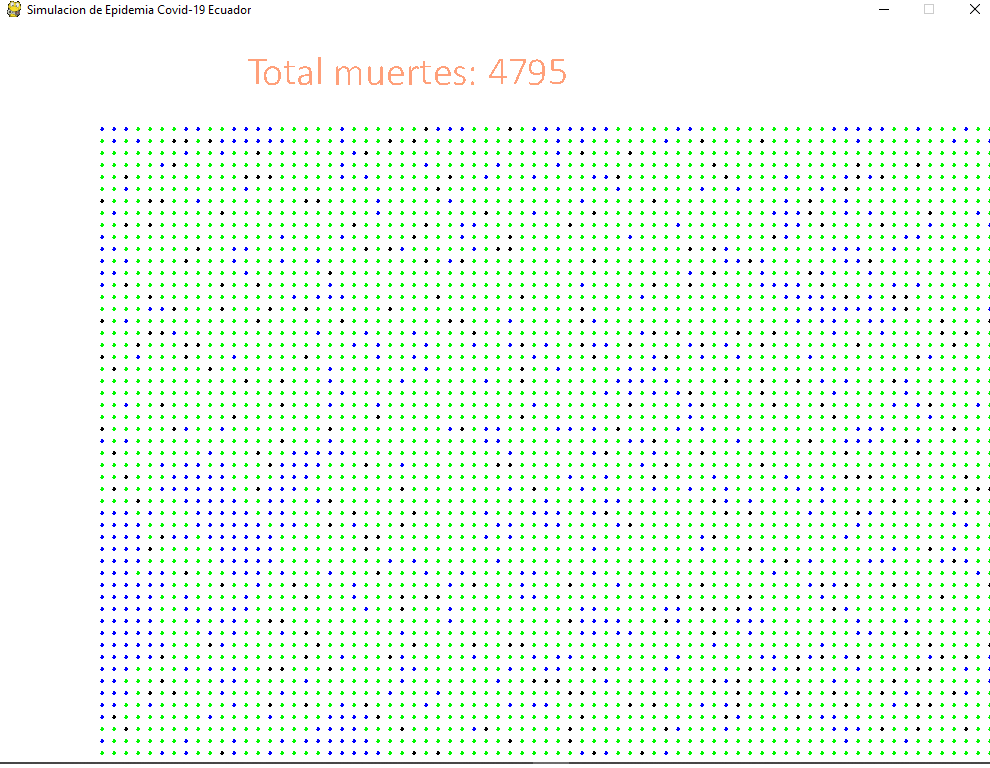


In [1]:
#Implementar

## Analisis
Como hemos observado en esta practica vemos que el factor mas importante es R0 dentro de una epidemia que representaba las personas contagiadas y posibles a ser contagiadas en otros casos, en donde dentro de la simulacion nos muestra la velocidad de crecimiento del virus en la poblacion y el el total de muestres que presentaria.
## Conclusiones
En base a las simulaciones obtenidad podemos decir que el crecimiento de del virus y su indice de muertos es alamarte en caso de que nuestro R0 sea mayo a 4 como verificamos, ademas se propagaba de manera mas rapida, que si en indice fuera RO:1 la probabilidad de muertos quedaba entre 0-2 aproximadamente.
## Opinion
Puedo decir que con base en los dtos obtenidos no es claro si este virus se propagaria de tal manera ya que no sabemos si la informacion obtenida es 100% real, aun asi esta simulacion nos a mostrado la diferencia que existira en caso de que el indice R0 sea mayor dando un alto caso de muertos, y con la prediccion a una semana que disminuyo debido a que posiblemente estemos entrando en la etapa de plameacion de la curva de propagacion del virus por lo que si podemos dejar en claro que es probable que en este sea el inicio de una disminucion de casos.

# Referencias
- http://code.intef.es/simulamos-una-epidemia-virica/
- 